In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [4]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector


In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [6]:
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,StandardScaler,MinMaxScaler

In [7]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix,classification_report

In [8]:
hou = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅데이터 캡스톤/housing.csv')
hou.shape

(20640, 10)

In [9]:
hou.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
HO= hou.copy()
HO.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
Hmiss = HO.isna().sum()
pmiss = Hmiss/HO.shape[0]
pd.concat([Hmiss,pmiss],axis=1).rename(columns={0:'Hmiss',1:'pmiss'})

,Hmiss,pmiss
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,0.010029
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [13]:
#결측 많은 컬럼 제거함
del HO['total_bedrooms']
HO.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
obj= list(HO.select_dtypes('object'))
num = list(HO.select_dtypes(np.number))
obj,num


(['ocean_proximity'],
 ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'population',
  'households',
  'median_income',
  'median_house_value'])

In [15]:
HO['ocean_proximity']= HO['ocean_proximity'].astype('category')
HO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   population          20640 non-null  float64 
 5   households          20640 non-null  float64 
 6   median_income       20640 non-null  float64 
 7   median_house_value  20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.3 MB


In [16]:
HO.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


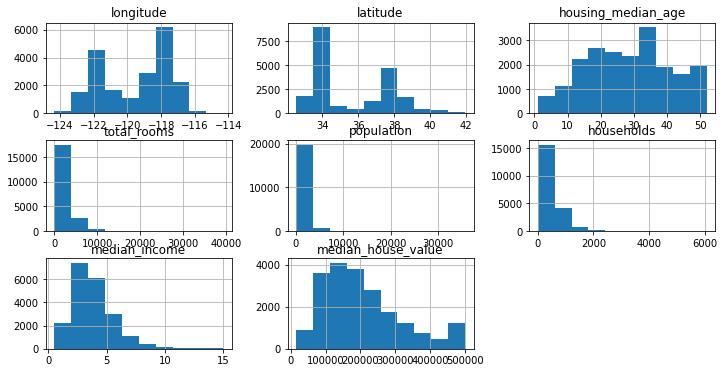

In [17]:
#EDA
HO.select_dtypes(include=np.number).hist(figsize=(12,6));

이상치제거

In [18]:
HO.select_dtypes(include=np.number)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
WKXnum = HO.select_dtypes(include=[np.number]).drop('median_house_value',axis=1)
Timpmed = SimpleImputer(strategy='median')
WKXnum= pd.DataFrame(Timpmed.fit_transform(WKXnum),index=WKXnum.index,columns=WKXnum.columns)
WKXnum.head()
Eisof = IsolationForest(random_state=42,contamination=0.05)
ih = Eisof.fit_predict(WKXnum)
np.unique(ih,return_counts=True)

#outlier 1032개

(array([-1,  1]), array([ 1032, 19608]))

In [20]:
#이상치 찍기
HO.iloc[ih == -1, : ]

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
73,-122.29,37.81,46.0,12.0,18.0,7.0,0.4999,67500.0,NEAR BAY
81,-122.27,37.81,52.0,210.0,183.0,56.0,1.1667,112500.0,NEAR BAY
88,-122.27,37.80,10.0,105.0,125.0,39.0,0.9722,137500.0,NEAR BAY
92,-122.28,37.80,52.0,96.0,191.0,34.0,0.7500,162500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20494,-118.12,34.13,52.0,2935.0,975.0,327.0,11.7060,500001.0,<1H OCEAN
20543,-121.74,38.55,33.0,6861.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [21]:
#이상치 아닌것만 뽑음
WK = HO.iloc[ih==1,:]

In [22]:
WK.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,19608.000000,19608.000000,19608.000000,19608.000000,19608.000000,19608.000000,19608.000000,19608.000000
mean,-119.570403,35.625300,29.183956,2347.304978,1287.740667,451.613219,3.797112,204961.129284
std,1.987450,2.121226,12.294493,1326.261020,729.754574,250.970767,1.762084,113672.569518
min,-124.350000,32.540000,1.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.780000,33.930000,19.000000,1436.000000,781.000000,278.000000,2.554050,118800.000000
50%,-118.490000,34.260000,29.500000,2079.000000,1144.000000,401.000000,3.508300,178500.000000
75%,-118.020000,37.710000,37.000000,2991.250000,1645.000000,575.250000,4.679300,262100.000000
max,-114.310000,41.950000,52.000000,12342.000000,5756.000000,1845.000000,15.000100,500001.000000


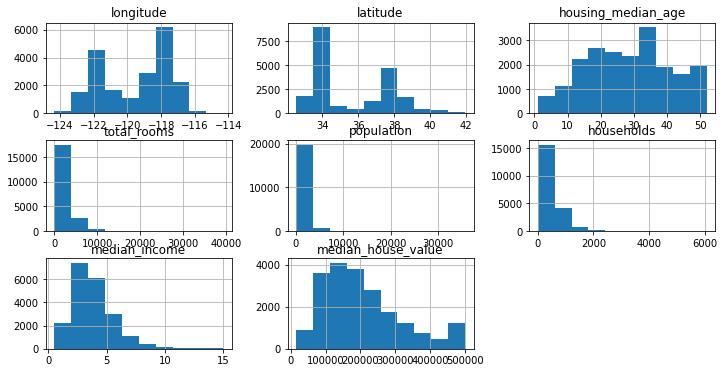

In [23]:
#원데이터EDA
HO.select_dtypes(include=np.number).hist(figsize=(12,6));

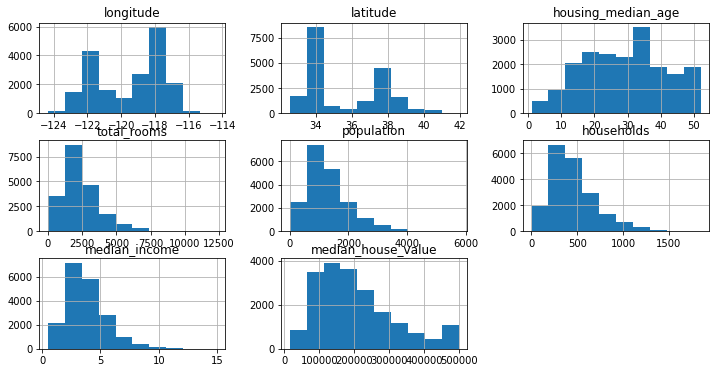

In [24]:
#이상치 제거 후 EDA
WK.select_dtypes(include=np.number).hist(figsize=(12,6));

분할

In [25]:
from sklearn.model_selection import train_test_split
TRX,TSX,TRy,TSy = train_test_split(HO.drop('median_house_value',axis=1),HO['median_house_value'],test_size=0.2, random_state=20180178)

파이프라인(make_pipeline, make_column_transformer)

In [26]:
def monkey_patch_get_signature_names_out():
  from inspect import Signature, signature, Parameter
  import pandas as pd
  from sklearn.impute import SimpleImputer
  from sklearn.pipeline import make_pipeline, Pipeline
  from sklearn.preprocessing import FunctionTransformer, StandardScaler

  default_get_feature_names_out = StandardScaler.get_feature_names_out

  if not hasattr(SimpleImputer, "get_feature_names_out"):
    print("Monkey-patching SimpleImputer.get_feature_names_out()")
    SimpleImputer.get_feature_names_out = default_get_feature_names_out

  if not hasattr(FunctionTransformer, "get_feature_names_out"):
    print("Monkey-patching FunctionTransformer.get_feature_names_out()")
    orig_init = FunctionTransformer.__init__
    orig_sig = signature(orig_init)
    
    def __init__(*args, feature_names_out=None, **kwargs):
      orig_sig.bind(*args, **kwargs)
      orig_init(*args, **kwargs)
      args[0].feature_names_out = feature_names_out

    __init__.__signature__ = Signature(
        list(signature(orig_init).parameters.values()) + [
            Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])
    def get_feature_names_out(self, names=None):
      if self.feature_names_out is None:
        return default_get_feature_names_out(self, names)
      elif callable(self.feature_names_out):
        return self.feature_names_out(names)
      else:
        return self.feature_names_out

    FunctionTransformer.__init__ = __init__
    FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [27]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer


In [28]:
catx =TRX.select_dtypes('category').columns
numx = TRX.select_dtypes('number').columns

In [29]:
pnum = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
pcat = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
pp =  make_column_transformer((pnum, make_column_selector(dtype_include=np.number)),(pcat, make_column_selector(dtype_include='category')))
TRX_prep = pp.fit_transform(TRX)
TRX_prep

array([[ 0.79337936, -0.75263042,  0.34509867, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85407217,  1.17349172,  0.9015237 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72348747, -0.82743128,  0.58356654, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25766115, -1.37441257, -1.5626443 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.41819951,  1.27166784,  0.34509867, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.15282333, -1.13130977, -0.52928352, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
pp

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7d0544490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7d0544a50>)])

예측모형 1. linear regression

모든 튜닝은 GridResearchCV로 진행

In [31]:
from sklearn.linear_model import LinearRegression
PElm = make_pipeline(pp, LinearRegression())
PElm = Pipeline([('PP', pp), ('lm', LinearRegression())])

In [32]:
PElm.fit(TRX, TRy)
PElm.score(TRX, TRy), PElm.score(TSX, TSy),

(0.6420850308781485, 0.6462935846197273)

In [33]:
PElm.predict(TRX)[:5]

array([178418.54596   , 117363.67420444, 266561.8902923 , 273976.57739396,
       357511.52972183])

In [34]:
#5fold cv
from sklearn.model_selection import cross_validate, cross_val_score
cross_val_score(PElm, TRX, TRy, scoring='r2', cv=5), -cross_val_score(PElm, TRX, TRy, scoring='neg_root_mean_squared_error')

(array([0.6289376 , 0.65990597, 0.61968014, 0.64181379, 0.64696002]),
 array([69611.09635146, 68443.64438314, 70582.29272011, 70696.46446387,
        68290.52853722]))

In [35]:
scr = {'mse' :'neg_mean_squared_error',
       'rmse':'neg_root_mean_squared_error',
       'mae' :'neg_mean_absolute_error',
       'mape':'neg_mean_absolute_percentage_error',
       'r2' :'r2'}

In [36]:
CV = cross_validate(PElm, TRX, TRy, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CV.filter(regex='test')
#r2= 0.66가 성능 제일 좋음

,test_mse,test_rmse,test_mae,test_mape,test_r2
0,4.845705e+09,69611.096351,50200.391845,0.289402,0.628938
1,4.684532e+09,68443.644383,50050.786088,0.286342,0.659906
2,4.981860e+09,70582.292720,50655.293133,0.297448,0.619680
3,4.997990e+09,70696.464464,50962.311366,0.286313,0.641814
4,4.663596e+09,68290.528537,49987.197510,0.286850,0.646960


In [37]:
#각 모형 5fold cv결과 평균값
CVMETlm = CV.filter(regex='test').mean() # dplyr::filter와 다름
CVMET = CVMETlm.to_frame(name='lm').T
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.834737e+09,69524.805291,50371.195989,0.289271,0.63946


In [38]:
TROUT = pd.DataFrame(TRy.copy())
TROUT['yhlm'] = PElm.predict(TRX)
TSOUT = pd.DataFrame(TSy.copy())
TSOUT['yhlm'] = PElm.predict(TSX)
TSOUT.head()


,median_house_value,yhlm
19875,249200.0,278392.528725
10321,109800.0,151630.075532
19805,434800.0,264643.333312
8093,291700.0,272430.389018
2917,245800.0,287751.746832


In [39]:
#평가지표 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def metreg(y, yh, modelname=None):
  rmse = mean_squared_error (y, yh, squared=False)
  mse = rmse**2
  mae = mean_absolute_error(y, yh)
  mape = mean_absolute_percentage_error(y, yh)
  r2 = r2_score(y, yh)
  metrics = {'mse': rmse**2,
             'rmse':rmse,
             'mae': mean_absolute_error(y, yh),
             'mape':mean_absolute_percentage_error(y, yh),
             'r2' :r2_score(y, yh)}
  if modelname != None:
    return pd.DataFrame(metrics, index=[modelname])
  return metrics.abs()

TRMET = metreg(TROUT['median_house_value'], TROUT['yhlm'], modelname='TRlm')
TSMET = metreg(TSOUT['median_house_value'], TSOUT['yhlm'], modelname='TSlm')
TRMET

,mse,rmse,mae,mape,r2
TRlm,4.804642e+09,69315.525563,50309.512522,0.288907,0.642085


In [40]:
TSMET

,mse,rmse,mae,mape,r2
TSlm,4.555639e+09,67495.472849,49157.772722,0.287663,0.646294


예측모형 2. RandomForest

In [41]:
from sklearn.ensemble import RandomForestRegressor
PErf = make_pipeline(pp, RandomForestRegressor(random_state=20180178, max_depth=4, max_features='sqrt'))
PErf = Pipeline([ ('PP', pp), ('rf', RandomForestRegressor(random_state=20180178)) ])
PErf

Pipeline(steps=[('PP',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc7d0544490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEnco

In [42]:
PErf.fit(TRX, TRy)
PErf.score(TRX, TRy), PErf.score(TSX, TSy)
#lm보다 성능좋음

(0.9753461788588234, 0.8115810985860741)

In [43]:
CV = cross_validate(PErf, TRX, TRy, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETrf = CV.filter(regex='test').mean()
CVMETrf = CVMETrf.to_frame(name='rf').T
CVMET = pd.concat([CVMET, CVMETrf], axis=0)
CVMET
#rf가 성능 더 좋음

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.834737e+09,69524.805291,50371.195989,0.289271,0.639460
rf,2.442322e+09,49417.647553,32178.215620,0.178619,0.817943


In [44]:
#GridSearchCV로 randomforest 튜닝


In [45]:
PErf = make_pipeline(pp, RandomForestRegressor(random_state=20180178))
PErf = Pipeline([ ('PP', pp), ('rf', RandomForestRegressor(random_state=20180178)) ])
PErf.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'PP', 'rf', 'PP__n_jobs', 'PP__remainder', 'PP__sparse_threshold', 'PP__transformer_weights', 'PP__transformers', 'PP__verbose', 'PP__verbose_feature_names_out', 'PP__pipeline-1', 'PP__pipeline-2', 'PP__pipeline-1__memory', 'PP__pipeline-1__steps', 'PP__pipeline-1__verbose', 'PP__pipeline-1__simpleimputer', 'PP__pipeline-1__standardscaler', 'PP__pipeline-1__simpleimputer__add_indicator', 'PP__pipeline-1__simpleimputer__copy', 'PP__pipeline-1__simpleimputer__fill_value', 'PP__pipeline-1__simpleimputer__missing_values', 'PP__pipeline-1__simpleimputer__strategy', 'PP__pipeline-1__simpleimputer__verbose', 'PP__pipeline-1__standardscaler__copy', 'PP__pipeline-1__standardscaler__with_mean', 'PP__pipeline-1__standardscaler__with_std', 'PP__pipeline-2__memory', 'PP__pipeline-2__steps', 'PP__pipeline-2__verbose', 'PP__pipeline-2__simpleimputer', 'PP__pipeline-2__onehotencoder', 'PP__pipeline-2__simpleimputer__add_indicator', 'PP__pipeline-2__simpleimpute

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'rf__max_features': ['auto', 'sqrt', 'log2'],'rf__n_estimators':[50, 100, 200]}
GSrf = GridSearchCV(PErf, param_grid, cv=5)
GSrf.fit(TRX, TRy)
GSrf.score(TRX, TRy), GSrf.score(TSX, TSy)



(0.9760598614272906, 0.8130438859989548)

In [47]:
#최적모수
GSrf.best_params_


{'rf__max_features': 'auto', 'rf__n_estimators': 200}

In [48]:
tmp = pd.DataFrame(GSrf.cv_results_)
tmp.loc[:,['params', 'mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.816070,0.001725,7
1,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.817943,0.002589,4
2,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.819371,0.003073,1
3,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.812550,0.004834,8
4,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.816916,0.004191,5
5,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.818161,0.004345,2
6,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.812550,0.004834,8
7,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.816916,0.004191,5
8,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.818161,0.004345,2


In [49]:
GSrf.best_estimator_['rf'].feature_importances_
#변수중요도

array([1.11634474e-01, 1.06856364e-01, 5.28029528e-02, 2.99167213e-02,
       3.19787116e-02, 2.55108818e-02, 4.87926338e-01, 3.51646807e-03,
       1.42043281e-01, 1.65754855e-04, 9.72799599e-04, 6.67525290e-03])

In [50]:
cross_val_score(GSrf.best_estimator_, TRX, TRy, scoring='r2', cv=5), \
-cross_val_score(GSrf.best_estimator_, TRX, TRy, scoring='neg_root_mean_squared_error', cv=5)


(array([0.8188637 , 0.82252818, 0.81753053, 0.82304733, 0.81488773]),
 array([48635.98813764, 49442.26125836, 48889.58688954, 49690.32300863,
        49449.98085157]))

In [51]:
CV = cross_validate(GSrf.best_estimator_, TRX, TRy, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs() 
CVMETrfg = CV.filter(regex='test').mean()
CVMETrfg = CVMETrfg.to_frame(name='rfg').T
CVMET = pd.concat([CVMET, CVMETrfg], axis=0)
CVMET
#rf gridsearch튜닝이 좀더 높게 나옴

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.834737e+09,69524.805291,50371.195989,0.289271,0.639460
rf,2.442322e+09,49417.647553,32178.215620,0.178619,0.817943
rfg,2.422923e+09,49221.628029,32070.877948,0.177858,0.819371


예측모형 3. ligtgbm

In [52]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 2.1 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 209 kB 48.6 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 147 kB 44.0 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 112 kB 46.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d66f5f9a19789d0783b2808033b6d4a087470add0aad602b84ed183d4ff0f786
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [53]:
import lightgbm as lgb
import optuna
from optuna import Trial
PElgb = make_pipeline(pp, lgb.LGBMRegressor(random_state=20180178))
PElgb = Pipeline([ ('PP', pp), ('lgb', lgb.LGBMRegressor(random_state=20180178)) ])
PElgb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'PP', 'lgb', 'PP__n_jobs', 'PP__remainder', 'PP__sparse_threshold', 'PP__transformer_weights', 'PP__transformers', 'PP__verbose', 'PP__verbose_feature_names_out', 'PP__pipeline-1', 'PP__pipeline-2', 'PP__pipeline-1__memory', 'PP__pipeline-1__steps', 'PP__pipeline-1__verbose', 'PP__pipeline-1__simpleimputer', 'PP__pipeline-1__standardscaler', 'PP__pipeline-1__simpleimputer__add_indicator', 'PP__pipeline-1__simpleimputer__copy', 'PP__pipeline-1__simpleimputer__fill_value', 'PP__pipeline-1__simpleimputer__missing_values', 'PP__pipeline-1__simpleimputer__strategy', 'PP__pipeline-1__simpleimputer__verbose', 'PP__pipeline-1__standardscaler__copy', 'PP__pipeline-1__standardscaler__with_mean', 'PP__pipeline-1__standardscaler__with_std', 'PP__pipeline-2__memory', 'PP__pipeline-2__steps', 'PP__pipeline-2__verbose', 'PP__pipeline-2__simpleimputer', 'PP__pipeline-2__onehotencoder', 'PP__pipeline-2__simpleimputer__add_indicator', 'PP__pipeline-2__simpleimput

In [54]:
PElgb.fit(TRX, TRy)
PElgb.score(TRX, TRy), PElgb.score(TSX, TSy) 

(0.8754716401188414, 0.8272231512596127)

In [55]:
cross_val_score(PElgb, TRX, TRy, scoring='r2', cv=5), \
-cross_val_score(PElgb, TRX, TRy, scoring='neg_root_mean_squared_error', cv=5)

(array([0.8328099 , 0.83686952, 0.82107983, 0.83643563, 0.82908393]),
 array([46726.18038373, 47402.49234766, 48411.76492595, 47773.56124431,
        47516.01096358]))

In [56]:
CV = cross_validate(PElgb, TRX, TRy, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgb = CV.filter(regex='test').mean() 
CVMETlgb = CVMETlgb.to_frame(name='lgb').T
CVMET = pd.concat([CVMET, CVMETlgb], axis=0)
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.834737e+09,69524.805291,50371.195989,0.289271,0.639460
rf,2.442322e+09,49417.647553,32178.215620,0.178619,0.817943
rfg,2.422923e+09,49221.628029,32070.877948,0.177858,0.819371
lgb,2.262823e+09,47566.001973,31881.823626,0.177995,0.831256


In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'lgb__num_leaves':[50, 100, 200],
'lgb__min_child_samples':[1, 10,20],
'lgb__max_depth':[-1, 10, 20],
'lgb__learning_rate':[0.1, 0.2, 0.3],
'lgb__reg_alpha':[0, 0.01,0.02]}
GSlgb = GridSearchCV(PElgb, param_grid, cv=5) 
%time GSlgb.fit(TRX, TRy)
GSlgb.score(TRX, TRy), GSlgb.score(TSX, TSy)


CPU times: user 27min, sys: 49.7 s, total: 27min 49s
Wall time: 15min 4s


(0.9375902152894721, 0.834148317993652)

In [58]:
GSlgb.best_params_

{'lgb__learning_rate': 0.1,
 'lgb__max_depth': -1,
 'lgb__min_child_samples': 10,
 'lgb__num_leaves': 100,
 'lgb__reg_alpha': 0}

In [59]:
cross_val_score(GSlgb.best_estimator_, TRX, TRy, scoring='r2', cv=5), \
-cross_val_score(GSlgb.best_estimator_, TRX, TRy, scoring='neg_root_mean_squared_error', cv=5)


(array([0.844768  , 0.84532187, 0.826805  , 0.84572491, 0.84188135]),
 array([45024.16066621, 46158.11634135, 47630.9159295 , 46397.13545096,
        45702.51306927]))

In [60]:
#변수중요도
GSlgb.best_estimator_['lgb'].feature_importances_


array([1838, 1907, 1022, 1130, 1275, 1028, 1357,  101,  114,    0,   39,
         89])

최종모형 확정

In [61]:
CV = cross_validate(GSlgb.best_estimator_, TRX, TRy, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgbg = CV.filter(regex='test').mean()
CVMETlgbg = CVMETlgbg.to_frame(name='lgbg').T
CVMET = pd.concat([CVMET, CVMETlgbg], axis=0)
CVMET
#ligtgbm gridsearch 튜닝이 제일 좋음

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.834737e+09,69524.805291,50371.195989,0.289271,0.639460
rf,2.442322e+09,49417.647553,32178.215620,0.178619,0.817943
rfg,2.422923e+09,49221.628029,32070.877948,0.177858,0.819371
lgb,2.262823e+09,47566.001973,31881.823626,0.177995,0.831256
lgbg,2.133573e+09,46182.568291,30143.978066,0.167208,0.840900
